<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **30** minutes


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [1]:
#Import required libraries
import pandas as pd
import requests
import json

In [2]:
api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"

In [3]:
response = requests.get(api_url)

if response.status_code == 200:
    data = response.json()
    print("The data from the API has successfully loaded")
else:
    print(f"Error: API request failed with status code {response.status_code}")

The data from the API has successfully loaded


In [4]:
df = pd.DataFrame(data)
specific_loc = ['Los Angeles', 'New York', 'San Francisco', 'Washington DC', 'Seattle', 'Austin', 'Detroit']
job_postings_per_loc = df[df['Location'].isin(specific_loc)]
job_postings_per_loc = job_postings_per_loc['Location'].value_counts()
job_postings_per_loc

Location
Washington DC    5316
Detroit          3945
Seattle          3375
New York         3226
Los Angeles       640
San Francisco     435
Austin            434
Name: count, dtype: int64

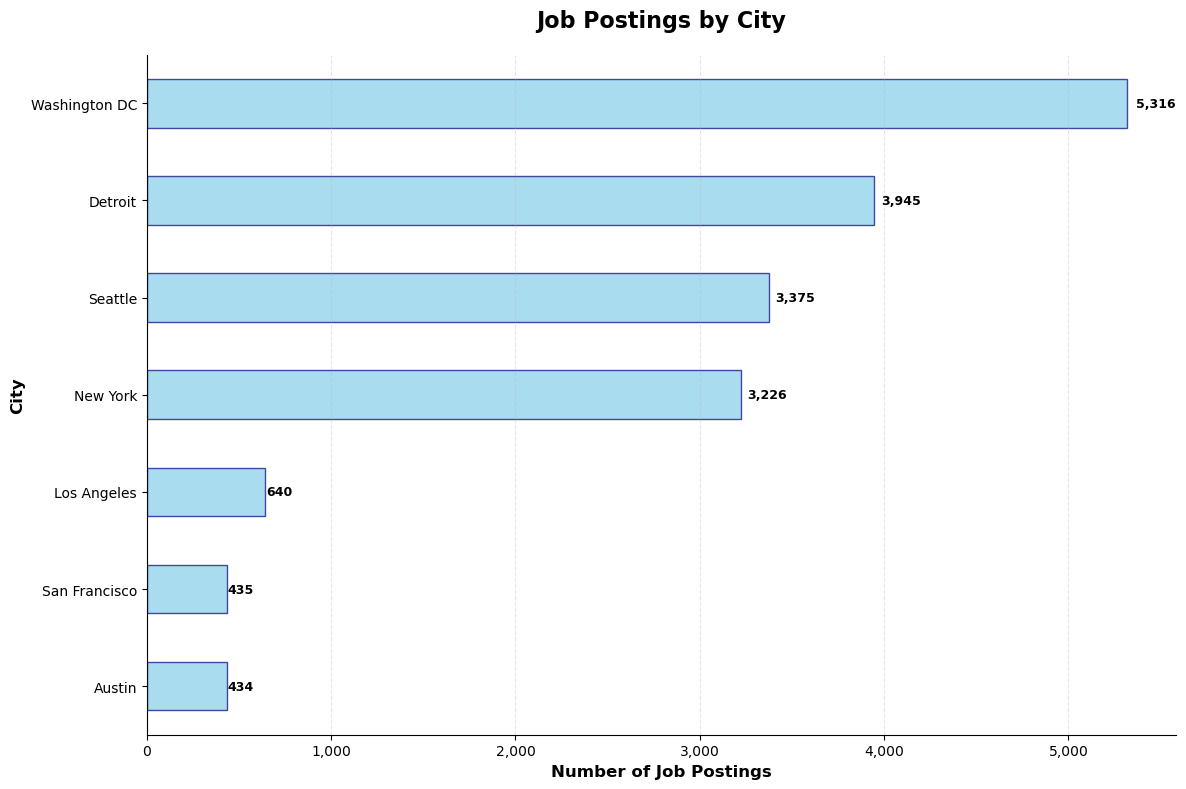

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Sort values for better visualization (largest at top)
job_postings_sorted = job_postings_per_loc.sort_values()

# Create the horizontal bar plot
bars = job_postings_sorted.plot(kind='barh', color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Job Postings by City', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Job Postings', fontsize=12, fontweight='bold')
plt.ylabel('City', fontsize=12, fontweight='bold')

plt.xticks(fontsize=10)
plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels with better formatting
for i, (city, count) in enumerate(job_postings_sorted.items()):
    plt.text(count + (count * 0.01), i, f'{count:,}', 
             va='center', fontsize=9, fontweight='bold')

# Format x-axis to show commas for large numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



In [6]:
for job in df:
            job_title=df['Job Title']
            job_experience = df['Job Experience Required']
            key_skills = df['Key Skills']
            role_category = df['Role Category']
            location = df['Location']
            functional_area = df['Functional Area']
            industry = df['Industry']
            role = df['Role']



In [7]:
def number_of_jobs_for_tech(technology):
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        technology_count= 0
        job_titles=[]
        
        for job in data:
            job_title = job.get('Job Title', '')
            job_experience = job.get('Job Experience Required', '')
            key_skills = job.get('Key Skills', '')
            role_category = job.get('Role Category', '')
            location = job.get('Location', '')
            functional_area = job.get('Functional Area', '')
            industry = job.get('Industry', '')
            role = job.get('Role', '')

            search_text = f"{job_title}{key_skills}{job_experience}{role_category}{location}{functional_area}{industry}{role}".lower()

            if technology.lower() in search_text:
                technology_count +=1

                if job_title and job_title not in job_titles:
                    job_titles.append(job_title)

        
        return f"The number of {technology} jobs is {technology_count}"

    else:
        print(f"Error: API request failed with status code {response.status_code}")
        return 0

    


Calling the function for Python and checking if it works.


In [8]:
number_of_jobs_for_tech("Python")

'The number of Python jobs is 1189'

#### Write a function to find number of jobs in US for a location of your choice


In [9]:
def number_of_jobs_for_loc(loc):
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()
        location_count= 0
        job_titles=[]
        
        for job in data:
            job_title = job.get('Job Title', '')
            job_experience = job.get('Job Experience Required', '')
            key_skills = job.get('Key Skills', '')
            role_category = job.get('Role Category', '')
            location = job.get('Location', '')
            functional_area = job.get('Functional Area', '')
            industry = job.get('Industry', '')
            role = job.get('Role', '')

            search_text = f"{job_title}{key_skills}{job_experience}{role_category}{location}{functional_area}{industry}{role}".lower()

            if loc.lower() in search_text:
                location_count +=1

                if job_title and job_title not in job_titles:
                    job_titles.append(job_title)

        
        return f"The number of {loc} jobs is {location_count}"

    else:
        print(f"Error: API request failed with status code {response.status_code}")
        return 0


Call the function for Los Angeles and check if it is working.


In [10]:
number_of_jobs_for_loc('Los Angeles')


'The number of Los Angeles jobs is 640'

### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [11]:
#your code goes here

import requests

def get_all_technologies():
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    
    response = requests.get(api_url)
    
    if response.status_code == 200:
        data = response.json()
        all_skills = set()
        
        for job in data:
            key_skills = job.get('Key Skills', '')
            if key_skills:
                skills = key_skills.replace('|', ',').replace('/', ',').split(',')
                for skill in skills:
                    cleaned_skill = skill.strip()
                    if cleaned_skill:  # Only add non-empty skills
                        all_skills.add(cleaned_skill)
        
        technologies_list = sorted(list(all_skills))
        return technologies_list
    else:
        print(f"Error: Status code {response.status_code}")
        return []

technologies_list = get_all_technologies()
print(f"Total unique technologies/skills: {len(technologies_list)}")
print("Sample technologies:")
for tech in technologies_list[:20]:
    print(f"  - {tech}")

Total unique technologies/skills: 22550
Sample technologies:
  - " ; .NET Framework
  - " ; .net" ;
  - " ; dot net" ;
  - " ; react" ;
  - " ; reactjs
  - " ; windows administration" ;
  - " ; windows administrator" ;
  - " ; windows server administration" ;
  - " ; windows server engineer" ;
  - " VFD Panel
  - & centOS
  - ' ; plsql developer' ;
  - *ITIL
  - *big data
  - . net
  - .NET
  - .NET Architect
  - .NET Core
  - .NET DEVELOPER
  - .NET Developer


Import libraries required to create excel spreadsheet


In [12]:
!pip install openpyxl
from openpyxl import Workbook

Create a workbook and select the active worksheet


In [13]:
wb = Workbook()
ws = wb.active

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [14]:
#your code goes here
import requests
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment
from collections import Counter

def create_technology_jobs_report(filename):
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    response = requests.get(api_url)
    
    if response.status_code != 200:
        print(f"Error fetching data: {response.status_code}")
        return
    
    data = response.json()
    print(f"Total jobs fetched: {len(data)}")

    all_skills = []
    for job in data:
        key_skills = job.get('Key Skills', '')
        if key_skills:

            skills = key_skills.replace('|', ',').replace('/', ',').split(',')
            all_skills.extend([skill.strip() for skill in skills if skill.strip()])
    

    tech_counter = Counter(all_skills)
    

    wb = Workbook()
    ws = wb.active
    ws.title = "Technology Job Counts"
    

    headers = ['Technology', 'Number of Job Postings']
    for col, header in enumerate(headers, 1):
        cell = ws.cell(row=1, column=col, value=header)
        cell.font = Font(bold=True, color="FFFFFF", size=12)
        cell.fill = PatternFill(start_color="2F75B5", end_color="2F75B5", fill_type="solid")
        cell.alignment = Alignment(horizontal="center")
    

    row = 2
    for technology, count in tech_counter.most_common():  # Sorted by most common first
        ws.cell(row=row, column=1, value=technology)
        ws.cell(row=row, column=2, value=count)
        row += 1

    for column in ws.columns:
        max_length = 0
        column_letter = column[0].column_letter
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(str(cell.value))
            except:
                pass
        adjusted_width = min(max_length + 2, 50)
        ws.column_dimensions[column_letter].width = adjusted_width
    
    wb.save(f"{filename}.xlsx")
    
    print(f"Excel file '{filename}' created successfully!")
    print(f"Total unique technologies found: {len(tech_counter)}")
    print(f"Top 10 technologies by job count:")
    for tech, count in tech_counter.most_common(10):
        print(f"  - {tech}: {count} jobs")
    
    return tech_counter



Save into an excel spreadsheet named **job-postings.xlsx**.


In [15]:
create_technology_jobs_report('job-postings')

Total jobs fetched: 27005
Excel file 'job-postings' created successfully!
Total unique technologies found: 22550
Top 10 technologies by job count:
  - Javascript: 1434 jobs
  - SQL: 1293 jobs
  - HTML: 1286 jobs
  - Sales: 1222 jobs
  - Python: 1165 jobs
  - Management: 835 jobs
  - Recruitment: 806 jobs
  - Business Executive: 777 jobs
  - Java: 753 jobs
  - MySQL: 746 jobs


Counter({'Javascript': 1434,
         'SQL': 1293,
         'HTML': 1286,
         'Sales': 1222,
         'Python': 1165,
         'Management': 835,
         'Recruitment': 806,
         'Business Executive': 777,
         'Java': 753,
         'MySQL': 746,
         'Monitoring': 665,
         'Technical support': 654,
         'Linux': 645,
         'design': 635,
         'C': 627,
         'development': 624,
         'Analytical': 622,
         'Business Development': 612,
         'Computer science': 591,
         'sales': 590,
         'Operations': 587,
         'jQuery': 586,
         'Networking': 574,
         'Troubleshooting': 573,
         'PHP': 551,
         'Outbound': 541,
         'Oracle': 537,
         'XML': 532,
         'Agile': 514,
         'Customer Service': 503,
         'CSS': 490,
         'Automation': 477,
         'javascript': 461,
         'Coding': 456,
         'customer service': 447,
         'BPO': 442,
         'Finance': 436,
         'Accou

#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [16]:
# your code goes here

import requests
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment
from openpyxl.chart import BarChart, Reference

def create_specific_technologies_report():
    target_technologies = [
        'C', 'C#', 'C++', 'Java', 'JavaScript', 'Python', 
        'Scala', 'Oracle', 'SQL Server', 'MySQL Server', 
        'PostgreSQL', 'MongoDB'
    ]
    
    api_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    response = requests.get(api_url)
    
    if response.status_code != 200:
        print(f"Error fetching data: {response.status_code}")
        return
    
    data = response.json()
    print(f"Total jobs analyzed: {len(data)}")

    technology_counts = {tech: 0 for tech in target_technologies}

    for job in data:
        key_skills = job.get('Key Skills', '').lower()
        job_title = job.get('Job Title', '').lower()
        role = job.get('Role', '').lower()

        search_text = f"{key_skills} {job_title} {role}"

        for tech in target_technologies:
            search_tech = tech.lower()

            if tech == 'C':
                if ' c ' in search_text or search_text.startswith('c ') or search_text.endswith(' c'):
                    technology_counts[tech] += 1
            elif tech == 'C#':
                if 'c#' in search_text:
                    technology_counts[tech] += 1
            elif tech == 'C++':
                if 'c++' in search_text:
                    technology_counts[tech] += 1
            else:
                if search_tech in search_text:
                    technology_counts[tech] += 1

    wb = Workbook()
    ws = wb.active
    ws.title = "Technology Job Counts"

    headers = ['Technology', 'Number of Job Postings', 'Percentage of Job Postings']
    for col, header in enumerate(headers, 1):
        cell = ws.cell(row=1, column=col, value=header)
        cell.font = Font(bold=True, color="FFFFFF", size=12)
        cell.fill = PatternFill(start_color="2F75B5", end_color="2F75B5", fill_type="solid")
        cell.alignment = Alignment(horizontal="center")

    total_jobs = len(data)
    row = 2
    
    sorted_technologies = sorted(technology_counts.items(), key=lambda x: x[1], reverse=True)
    
    for technology, count in sorted_technologies:
        percentage = (count / total_jobs) * 100 if total_jobs > 0 else 0
        
        ws.cell(row=row, column=1, value=technology)
        ws.cell(row=row, column=2, value=count)
        ws.cell(row=row, column=3, value=f"{percentage:.1f}%")
        row += 1
    
    filename = 'specific_technologies_job_counts.xlsx'
    wb.save(filename)
    
    print(f"\nExcel file '{filename}' created successfully!")
    print(f"Technologies analyzed: {len(target_technologies)}")
    print(f"Total jobs scanned: {total_jobs}")
    
    print("\nTechnology Job Counts:")
    print("-" * 40)
    for tech, count in sorted_technologies:
        percentage = (count / total_jobs) * 100
        print(f"{tech:15} : {count:3} jobs ({percentage:.1f}%)")
    
    top_tech, top_count = sorted_technologies[0]
    print(f"\nMost in-demand: {top_tech} with {top_count} job postings")
    
    return technology_counts

technology_results = create_specific_technologies_report()


Total jobs analyzed: 27005

Excel file 'specific_technologies_job_counts.xlsx' created successfully!
Technologies analyzed: 12
Total jobs scanned: 27005

Technology Job Counts:
----------------------------------------
Java            : 3549 jobs (13.1%)
JavaScript      : 2254 jobs (8.3%)
Python          : 1189 jobs (4.4%)
Oracle          : 931 jobs (3.4%)
C#              : 556 jobs (2.1%)
C++             : 513 jobs (1.9%)
SQL Server      : 431 jobs (1.6%)
MongoDB         : 210 jobs (0.8%)
Scala           : 156 jobs (0.6%)
PostgreSQL      :  88 jobs (0.3%)
C               :  74 jobs (0.3%)
MySQL Server    :   0 jobs (0.0%)

Most in-demand: Java with 3549 job postings


In [17]:
df

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...
27000,29995,MTS-Software-Engineer,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| F...,Programming & Design,Detroit,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
27001,29996,Client Relationship Manager,1 - 5 yrs,Service delivery| LMS| CRE| Integration servic...,Operations,Detroit,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
27002,29997,Assoc. Prof.- CS,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Detroit,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
27003,29998,Application/Cyber Security Specialist-New Jersey,5 - 10 yrs,Security Analysis| Software Development Life C...,Programming & Design,Detroit,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © IBM Corporation.


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
